In [1]:
import scvelo as scv
import pandas

In [2]:
filename = '/beegfs/scratch/ric.cosr/ric.bonanomi/counts_Tomato_ref_BonanomiD_1287_scRNA_injury/2_TdTomato/velocyto/2_TdTomato.loom'
adata = scv.read(filename, cache=True)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
df = pandas.read_csv('/beegfs/scratch/ric.cosr/ric.bonanomi/counts_Tomato_ref_BonanomiD_1287_scRNA_injury/scvelo_newidents/injury_cell_new_idents.csv')
for i in df.index:
    df['Unnamed: 0'][i] = df['Unnamed: 0'][i].rstrip('-1_2')
df

,Unnamed: 0,V1
0,AAACCCATCACCTGGG,VENOUS_PLVAP+
1,AAACGAAAGAGAGTTT,VENOUS_PLVAP+
2,AAACGAAGTAGCCAGA,VENOUS_PLVAP+
3,AAACGAATCGTTCAGA,ARTERIAL
4,AAACGCTGTTGCGAAG,VENOUS_PLVAP+
...,...,...
1430,TTTGATCCATCCTCAC,TIP_1
1431,TTTGGAGAGGTGCATG,VENOUS_PLVAP+
1432,TTTGGTTAGTATAGGT,ARTERIAL
1433,TTTGGTTTCTACTATC,VENOUS_PLVAP+


In [4]:
df['V1'].value_counts()

VENOUS_PLVAP+       475
TIP_1               260
TIP_2               162
ARTERIAL            144
VENOUS_PLVAP-       121
TIP_3               100
BARR_END_CAP         83
CAPILLARY_PLVAP-     76
CAPILLARY_PLVAP+     14
Name: V1, dtype: int64

In [5]:
adata.obs['seurat'] = 'filtered'
adata.obs['cell_name'] = 'tobeassigned'
for i in range(len(adata.obs.index)):
    adata.obs['cell_name'][i] = adata.obs.index[i].replace('2_TdTomato:','').replace('x','')
adata.obs

,Clusters,_X,_Y,seurat,cell_name
2_TdTomato:AAAGGTACAGTAGAGCx,1,-13.862974,0.943917,filtered,AAAGGTACAGTAGAGC
2_TdTomato:AAAGGATTCTATTTCGx,1,-18.920582,-9.617810,filtered,AAAGGATTCTATTTCG
2_TdTomato:AACCATGTCCTGTAGAx,1,-18.021725,0.535599,filtered,AACCATGTCCTGTAGA
2_TdTomato:AACAAGACAGTGAGCAx,6,18.181885,-2.993695,filtered,AACAAGACAGTGAGCA
2_TdTomato:AAGAACAGTGGGATTGx,0,-17.597851,-15.877766,filtered,AAGAACAGTGGGATTG
...,...,...,...,...,...
2_TdTomato:TTTGACTCATAGAAACx,0,-19.484903,-24.337315,filtered,TTTGACTCATAGAAAC
2_TdTomato:TTTCACAGTCATCCGGx,1,-22.211842,17.958595,filtered,TTTCACAGTCATCCGG
2_TdTomato:TTTGGTTCATAGAAACx,4,2.160726,-42.155319,filtered,TTTGGTTCATAGAAAC
2_TdTomato:TTTGTTGGTGTTCGTAx,2,6.886977,15.483150,filtered,TTTGTTGGTGTTCGTA


In [6]:
for j in range(len(adata.obs['cell_name'])):
    for i in range(len(df['Unnamed: 0'])):
        if df['Unnamed: 0'][i] == adata.obs['cell_name'][j]:
            adata.obs['seurat'][j] = df['V1'][i]
            break
adata.obs

,Clusters,_X,_Y,seurat,cell_name
2_TdTomato:AAAGGTACAGTAGAGCx,1,-13.862974,0.943917,filtered,AAAGGTACAGTAGAGC
2_TdTomato:AAAGGATTCTATTTCGx,1,-18.920582,-9.617810,filtered,AAAGGATTCTATTTCG
2_TdTomato:AACCATGTCCTGTAGAx,1,-18.021725,0.535599,filtered,AACCATGTCCTGTAGA
2_TdTomato:AACAAGACAGTGAGCAx,6,18.181885,-2.993695,TIP_3,AACAAGACAGTGAGCA
2_TdTomato:AAGAACAGTGGGATTGx,0,-17.597851,-15.877766,TIP_2,AAGAACAGTGGGATTG
...,...,...,...,...,...
2_TdTomato:TTTGACTCATAGAAACx,0,-19.484903,-24.337315,VENOUS_PLVAP+,TTTGACTCATAGAAAC
2_TdTomato:TTTCACAGTCATCCGGx,1,-22.211842,17.958595,TIP_1,TTTCACAGTCATCCGG
2_TdTomato:TTTGGTTCATAGAAACx,4,2.160726,-42.155319,filtered,TTTGGTTCATAGAAAC
2_TdTomato:TTTGTTGGTGTTCGTAx,2,6.886977,15.483150,filtered,TTTGTTGGTGTTCGTA


In [7]:
adata.obs['seurat'].value_counts()

filtered            588
VENOUS_PLVAP+       475
TIP_1               260
TIP_2               162
ARTERIAL            144
VENOUS_PLVAP-       121
TIP_3               100
BARR_END_CAP         83
CAPILLARY_PLVAP-     76
CAPILLARY_PLVAP+     14
Name: seurat, dtype: int64

In [8]:
adata_filt = adata[adata.obs['seurat'] != 'filtered',:]

In [9]:
adata_filt.obs

,Clusters,_X,_Y,seurat,cell_name
2_TdTomato:AACAAGACAGTGAGCAx,6,18.181885,-2.993695,TIP_3,AACAAGACAGTGAGCA
2_TdTomato:AAGAACAGTGGGATTGx,0,-17.597851,-15.877766,TIP_2,AAGAACAGTGGGATTG
2_TdTomato:AAATGGATCTCCGCATx,0,-1.772396,-20.138823,TIP_1,AAATGGATCTCCGCAT
2_TdTomato:AAGACAAGTGGTTTGTx,6,6.553240,32.237732,VENOUS_PLVAP-,AAGACAAGTGGTTTGT
2_TdTomato:AAGTGAAGTCAACCATx,2,7.833901,10.743609,VENOUS_PLVAP+,AAGTGAAGTCAACCAT
...,...,...,...,...,...
2_TdTomato:TTTCATGAGCTAGATAx,1,-7.805002,7.899736,VENOUS_PLVAP+,TTTCATGAGCTAGATA
2_TdTomato:TTTGGAGAGGTGCATGx,4,29.711895,25.577990,VENOUS_PLVAP+,TTTGGAGAGGTGCATG
2_TdTomato:TTTCAGTTCGAACCTAx,5,24.996174,0.987152,TIP_1,TTTCAGTTCGAACCTA
2_TdTomato:TTTGACTCATAGAAACx,0,-19.484903,-24.337315,VENOUS_PLVAP+,TTTGACTCATAGAAAC


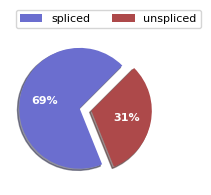

In [10]:
scv.pl.proportions(adata_filt)

In [11]:
scv.pp.filter_and_normalize(adata_filt, n_top_genes=4000)
scv.pp.moments(adata_filt, n_pcs=30, n_neighbors=30)

Trying to set attribute `.obs` of view, copying.


Normalized count data: X, spliced, unspliced.
Extracted 4000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
adata_filt.obs

,Clusters,_X,_Y,seurat,cell_name,initial_size_spliced,initial_size_unspliced,initial_size,n_counts
2_TdTomato:AACAAGACAGTGAGCAx,6,18.181885,-2.993695,TIP_3,AACAAGACAGTGAGCA,886,55,886.0,7956.000488
2_TdTomato:AAGAACAGTGGGATTGx,0,-17.597851,-15.877766,TIP_2,AAGAACAGTGGGATTG,22460,3510,22460.0,7956.000000
2_TdTomato:AAATGGATCTCCGCATx,0,-1.772396,-20.138823,TIP_1,AAATGGATCTCCGCAT,15564,4804,15564.0,7956.000488
2_TdTomato:AAGACAAGTGGTTTGTx,6,6.553240,32.237732,VENOUS_PLVAP-,AAGACAAGTGGTTTGT,10655,4335,10655.0,7956.000488
2_TdTomato:AAGTGAAGTCAACCATx,2,7.833901,10.743609,VENOUS_PLVAP+,AAGTGAAGTCAACCAT,3894,2876,3894.0,7956.000000
...,...,...,...,...,...,...,...,...,...
2_TdTomato:TTTCATGAGCTAGATAx,1,-7.805002,7.899736,VENOUS_PLVAP+,TTTCATGAGCTAGATA,4129,1984,4129.0,7956.000000
2_TdTomato:TTTGGAGAGGTGCATGx,4,29.711895,25.577990,VENOUS_PLVAP+,TTTGGAGAGGTGCATG,5829,2306,5829.0,7955.999512
2_TdTomato:TTTCAGTTCGAACCTAx,5,24.996174,0.987152,TIP_1,TTTCAGTTCGAACCTA,5836,2748,5836.0,7956.000000
2_TdTomato:TTTGACTCATAGAAACx,0,-19.484903,-24.337315,VENOUS_PLVAP+,TTTGACTCATAGAAAC,32792,16385,32792.0,7955.999512


In [13]:
scv.tl.velocity(adata_filt)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [14]:
scv.tl.velocity_graph(adata_filt)

computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [15]:
scv.tl.umap(adata_filt)

saving figure to file ./figures/scvelo_injury_umap.pdf


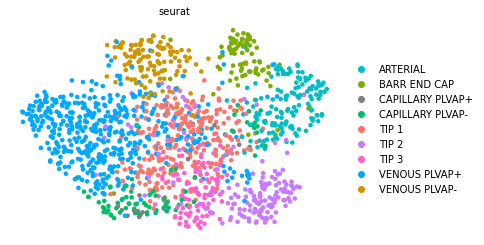

In [16]:
# palette = ['#00BFC4','#7CAE00','grey','#00BE67','#C77CFF','#FF61CC','black','#00A9FF','#CD9600','pink','#F8766D','brown']
palette = ['#00BFC4','#7CAE00','grey','#00BE67','#F8766D','#C77CFF','#FF61CC','#00A9FF','#CD9600','pink',"purple",'brown']
scv.pl.umap(adata_filt, color=['seurat'], palette = palette, legend_loc='right_margin', save='injury_umap.pdf')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_injury_umap_velo.png


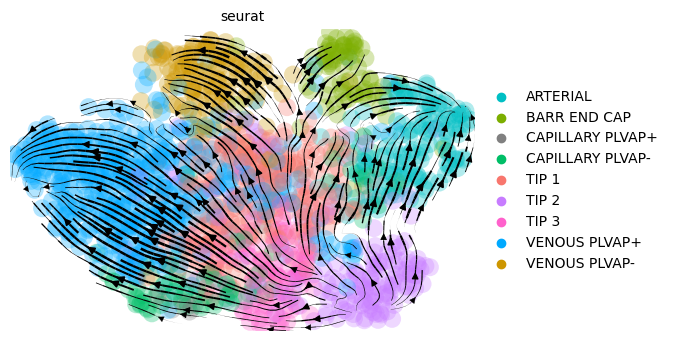

In [17]:
scv.pl.velocity_embedding_stream(adata_filt, basis='umap', color=['seurat'], palette = palette, 
                                 save='injury_umap_velo.pdf', dpi=100, legend_loc='right_margin')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
saving figure to file ./figures/scvelo_injury_umap_velo_length.pdf


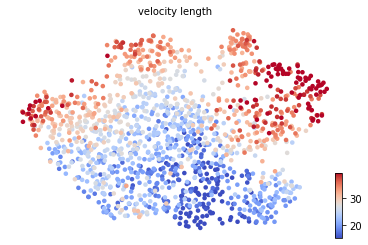

In [18]:
scv.tl.velocity_confidence(adata_filt)
scv.pl.scatter(adata_filt, c='velocity_length', cmap='coolwarm', perc=[5, 95], save='injury_umap_velo_length.pdf')

saving figure to file ./figures/scvelo_injury_umap_velo_conf.pdf


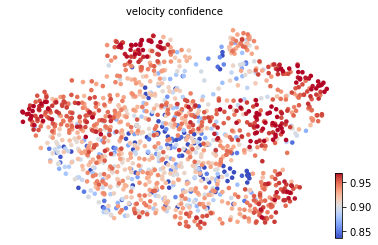

In [19]:
scv.pl.scatter(adata_filt, c='velocity_confidence', cmap='coolwarm', perc=[5, 95], save='injury_umap_velo_conf.pdf')

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


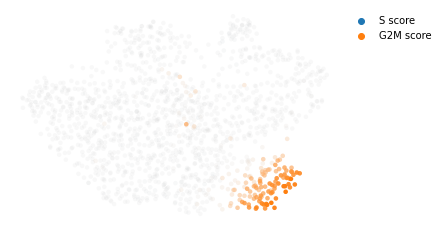

In [20]:
scv.tl.score_genes_cell_cycle(adata_filt)
scv.pl.scatter(adata_filt, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

In [21]:
adata_filt.obsm['X_umap']

array([[ 2.7277381,  2.572944 ],
       [ 3.4306967,  1.7162081],
       [ 0.7812999,  3.0834587],
       ...,
       [ 1.7536256,  3.8410647],
       [-1.6109685,  6.2768264],
       [ 3.7410002,  4.5972757]], dtype=float32)

In [22]:
adata_filt_seurat = adata_filt.copy()

In [23]:
ucoord = scv.load('injury_cell_umap.csv')
ucoord.index = [ x.rstrip('-1_2') for x in ucoord.index ]
ucoord = ucoord.reindex(index=adata_filt_seurat.obs['cell_name'].values)
ucoord = ucoord.to_numpy()
#for i in ucoord.index:
#    ucoord['Unnamed: 0'][i] = ucoord['Unnamed: 0'][i].rstrip('-1_2')
#ucoord.index = ucoord['Unnamed: 0'].values
#ucoord = ucoord.reindex(index=adata_filt_seurat.obs['cell_name'].index)
#ucoord = ucoord.drop('Unnamed: 0', axis='columns')

In [24]:
adata_filt_seurat.obsm['X_umap'] = ucoord
adata_filt_seurat.obsm['X_umap']

array([[-1.97542243, -1.88443276],
       [-5.4806581 , -0.54270776],
       [-3.31794982, -0.3710288 ],
       ...,
       [-0.63217931, -0.72085664],
       [-2.12149673,  2.57795695],
       [ 0.53038211, -2.09975525]])

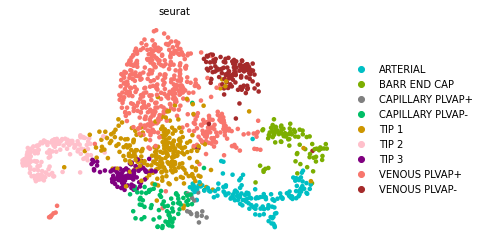

In [25]:
# arterial, barr, cap+, cap-, tip1, tip2, tip3, 
palette = ['#00BFC4','#7CAE00','grey','#00BE67','#CD9600','pink','purple','#F8766D','brown']
scv.pl.umap(adata_filt_seurat, color=['seurat'], palette = palette, legend_loc='right_margin')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_injury_seuratumap_velo.svg


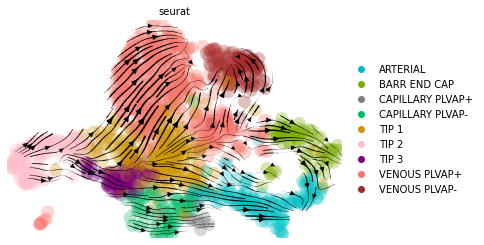

In [27]:
scv.tl.velocity(adata_filt_seurat)
scv.tl.velocity_graph(adata_filt_seurat)
scv.pl.velocity_embedding_stream(adata_filt_seurat, basis='umap', color=['seurat'], palette = palette, 
                                 legend_loc='right_margin', save='injury_seuratumap_velo.svg')

In [34]:
#scv.tl.differential_kinetic_test(adata_filt_seurat, groupby='clusters')

Help on function differential_kinetic_test in module scvelo.tools.dynamical_model:

differential_kinetic_test(data, var_names='velocity_genes', groupby=None, use_raw=None, return_model=None, add_key='fit', copy=None, **kwargs)
    Test to detect cell types / lineages with different kinetics.
    
    Likelihood ratio test for differential kinetics to detect clusters/lineages that
    display kinetic behavior that cannot be sufficiently explained by a single model
    for the overall dynamics. Each cell type is tested whether an independent fit yields
    a significantly improved likelihood.
    
    .. image:: https://user-images.githubusercontent.com/31883718/78930730-dc737200-7aa4-11ea-92f6-269b7609c3a5.png
    
    Arguments
    ---------
    data: :class:`~anndata.AnnData`
        Annotated data matrix.
    var_names: `str`,  list of `str` (default: `'velocity_genes`)
        Names of variables/genes to use for the fitting.
    groupby: `str` (default: `None`)
        Key of observ